# Implement this analysis in the Vorticity field 4 EKE.

In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import velocity fields values to python environment.

vncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_v.nc')
uncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_u.nc')
u=uncfile.variables['u'][0,0,:,:]
v=vncfile.variables['v'][0,0,:,:]
# Import geographic coordinates (Lon,Lat)
lon=uncfile.variables['xu_ocean_sub01'][:]
lat=uncfile.variables['yu_ocean_sub01'][:]

In [3]:
#Area in indexes, probably in the future it will be added an option for lon - lat coords.
areamap=array([[0,len(lon)],[0,len(lat)]])

In [4]:
def vorticity2D(u,v):
    dv_x=np.gradient(v[:,:],axis=1)
    du_y=np.gradient(u[:,:],axis=0)
    w=dv_x-du_y
    return w

w=vorticity2D(u,v)

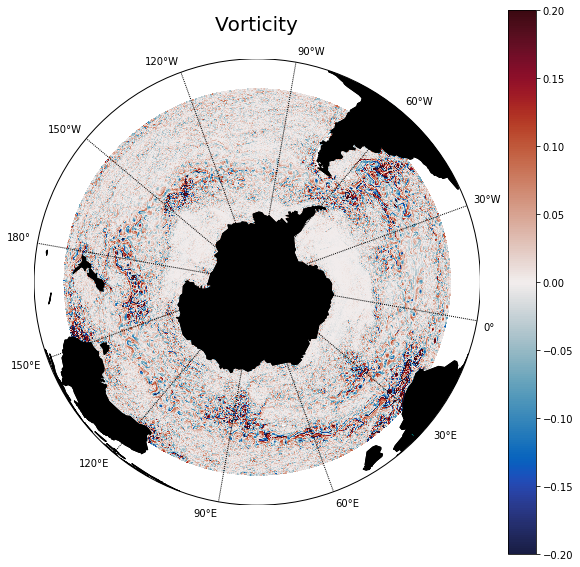

In [5]:
basemap_mplot(lon,lat,w,title="Vorticity",scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()
# EkE=0.5 * (u_avg**2 + v_avg**2)

In [6]:
eddytd=analyseddyzt(w,lon,lat,0,1,1,0.2,0.1,0.05,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 34 s  

In [7]:
threshold=1
eddysplot=exeddy(eddytd,lat,lon,w,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


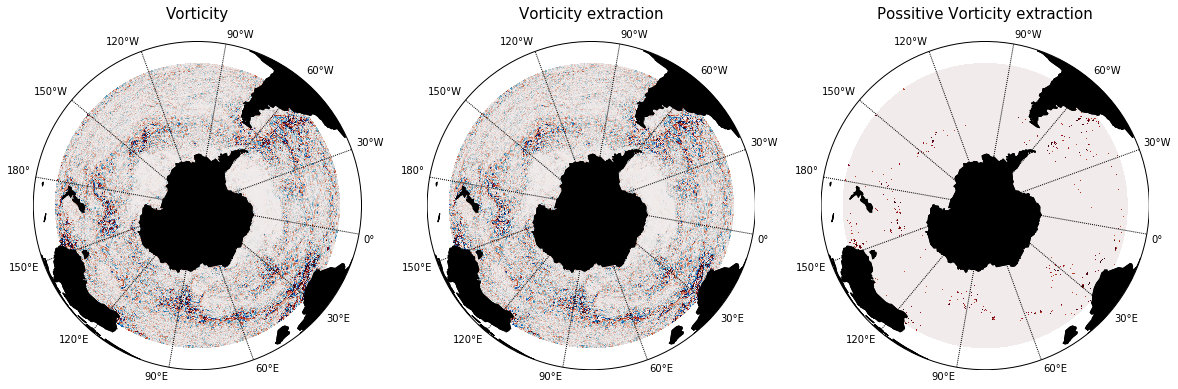

In [8]:
basemap_mplot(lon,lat,[w,w-eddysplot,eddysplot]\
              ,title=["Vorticity","Vorticity extraction","Possitive Vorticity extraction"],scale='Lin',\
              cmap=cm.cm.balance,vmin=-0.2,vmax=0.2,xan=1,yan=3,figsize=(20,20),fontsize=15);

In [9]:
eddytdn=analyseddyzt(w,lon,lat,0,1,1,-0.2,-0.1,-0.05,data_meant='',areamap=areamap,mask=''\
                     ,destdir='',okparm='',diagnostics=False,pprint=False)

If you whant to analyze in time the data need to be 3d [i.e. data(t,x,y)]
Be sure the data is an anomaly
 0% [>]100% Time Elapsed: 41 s  

In [10]:
threshold=1
eddysplotn=exeddy(eddytdn,lat,lon,w,0,threshold,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******


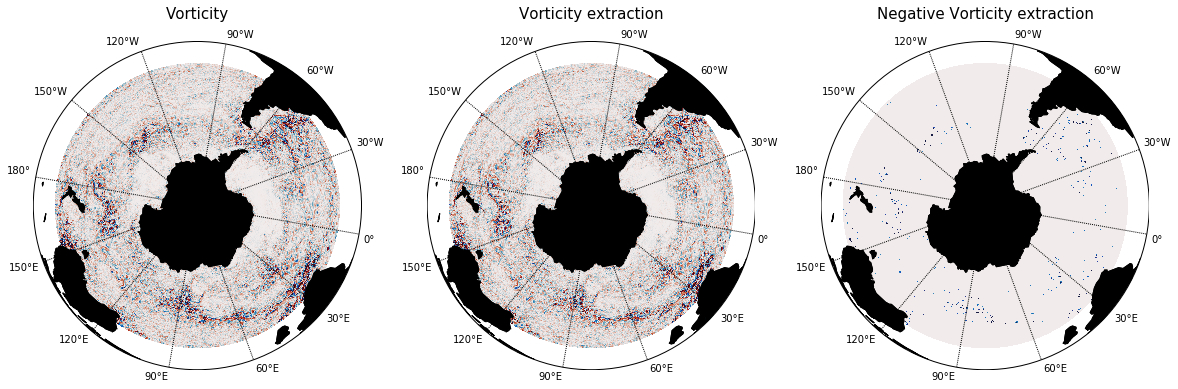

In [11]:
basemap_mplot(lon,lat,[w,w-eddysplotn,eddysplotn]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=1,yan=3,figsize=(20,20),fontsize=15);

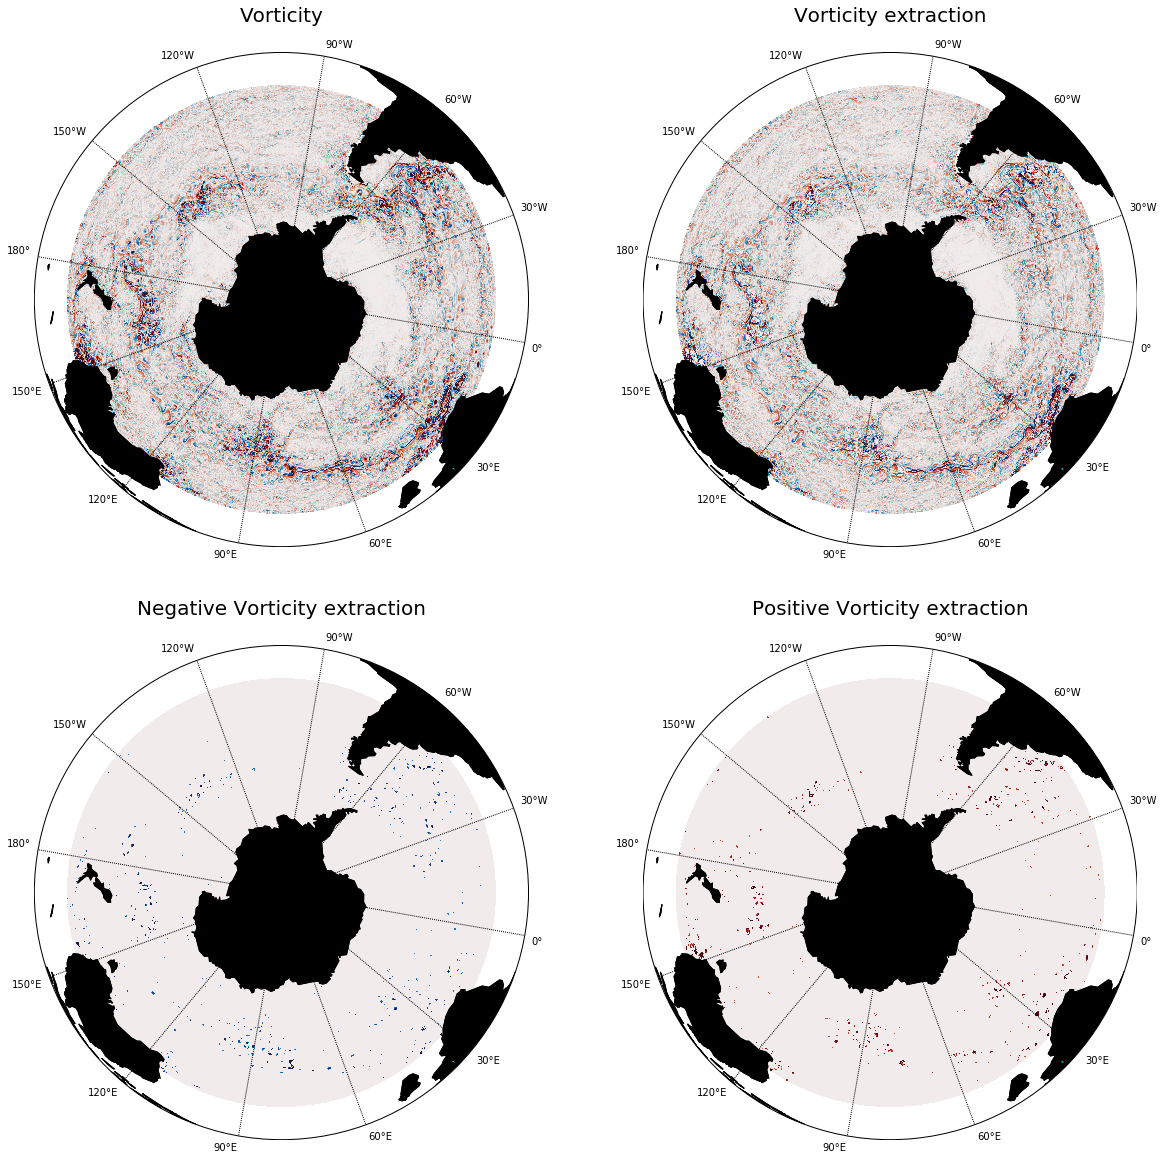

In [12]:
basemap_mplot(lon,lat,[w,w-eddysplot-eddysplotn,eddysplotn,eddysplot]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction",\
                       "Positive Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=20);

In [13]:
threshold=3
eddysup=exeddy(eddytd,lat,lon,u,0,threshold,inside=w,diagnostics=False)
eddysun=exeddy(eddytdn,lat,lon,u,0,threshold,inside=w,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


In [14]:
threshold=3
eddysvp=exeddy(eddytd,lat,lon,v,0,threshold,inside=w,diagnostics=False)
eddysvn=exeddy(eddytdn,lat,lon,v,0,threshold,inside=w,diagnostics=False)

*******Removing of eddies******
*******End the Removing of eddies******
*******Removing of eddies******
*******End the Removing of eddies******


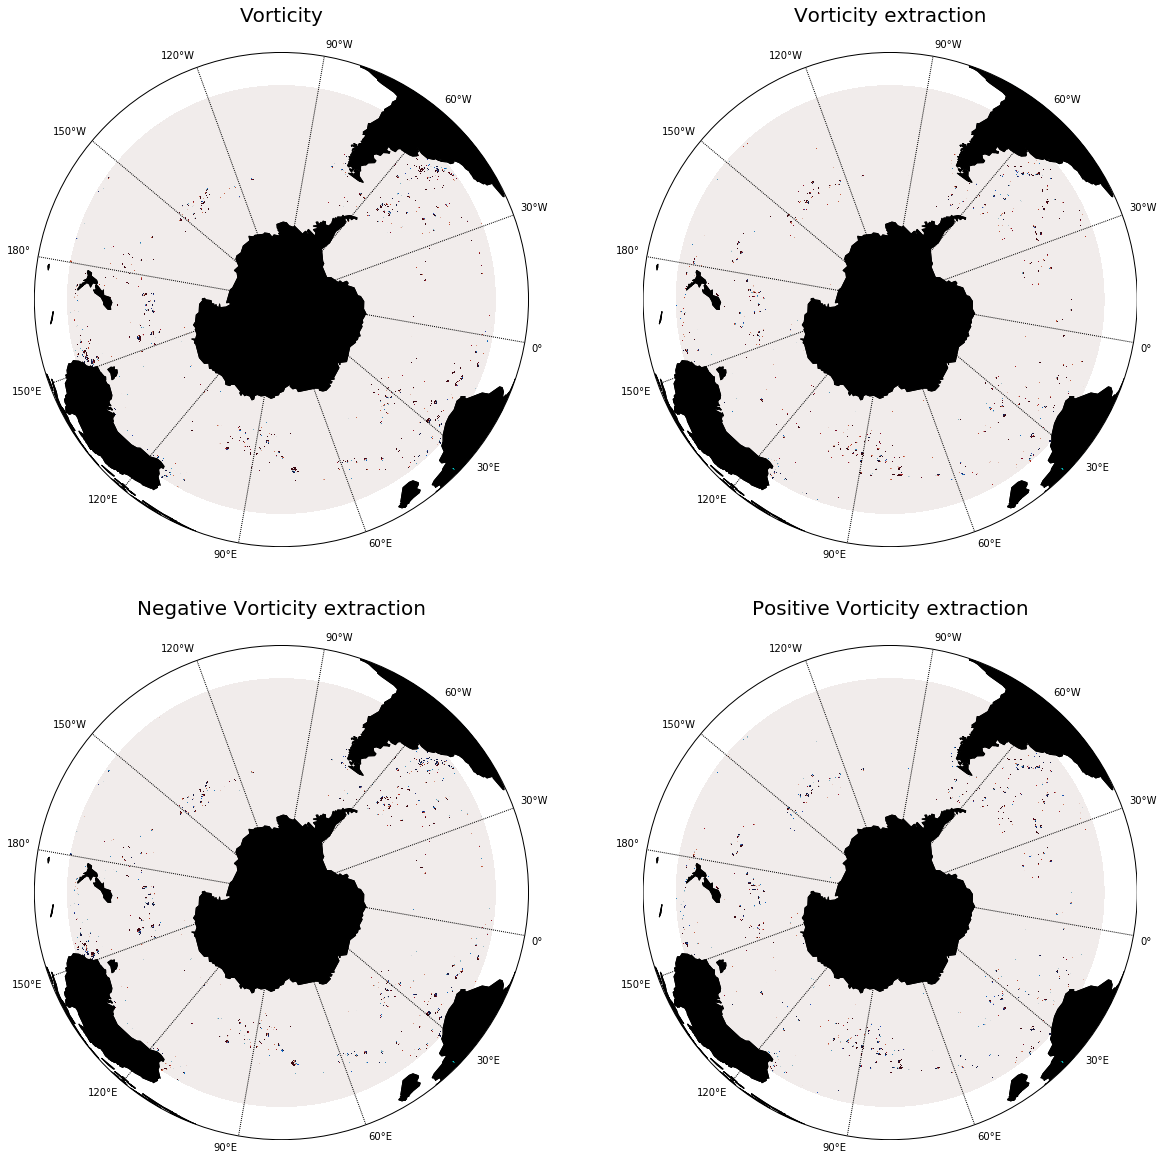

In [15]:
basemap_mplot(lon,lat,[eddysup,eddysun,eddysvp,eddysvn]\
              ,title=["Vorticity","Vorticity extraction","Negative Vorticity extraction",\
                       "Positive Vorticity extraction"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=20);

# EKE

In [16]:
eddyu=eddysun+eddysup
eddyv=eddysvn+eddysvp

In [17]:
def KE(u,v):
    ke=(1/2)*(u**2+v**2)
    return ke

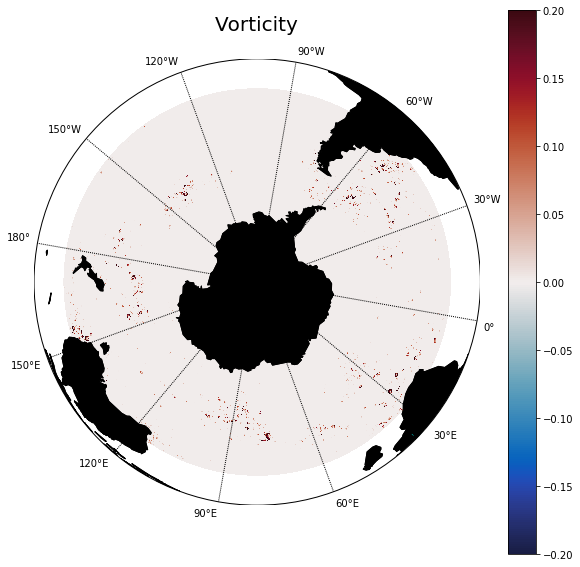

In [18]:
eke=KE(eddyu,eddyv)

basemap_mplot(lon,lat,eke,title="Vorticity",scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

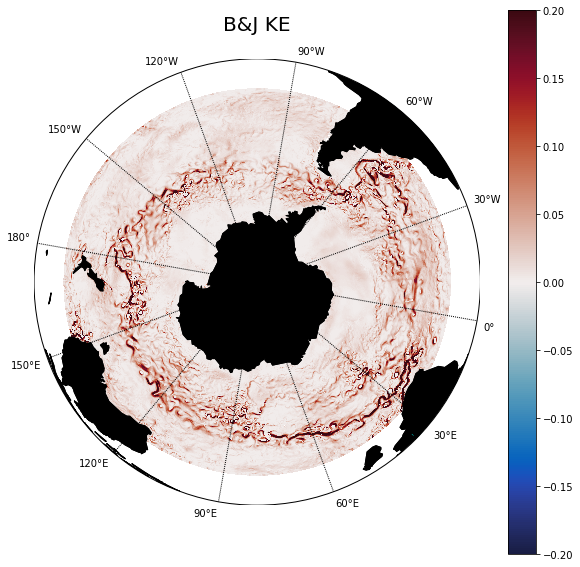

In [19]:
bjke=KE(u-eddyu,v-eddyv)
basemap_mplot(lon,lat,bjke,title="B&J KE",scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=1,yan=1,figsize=(10,10),fontsize=20);
colorbar()

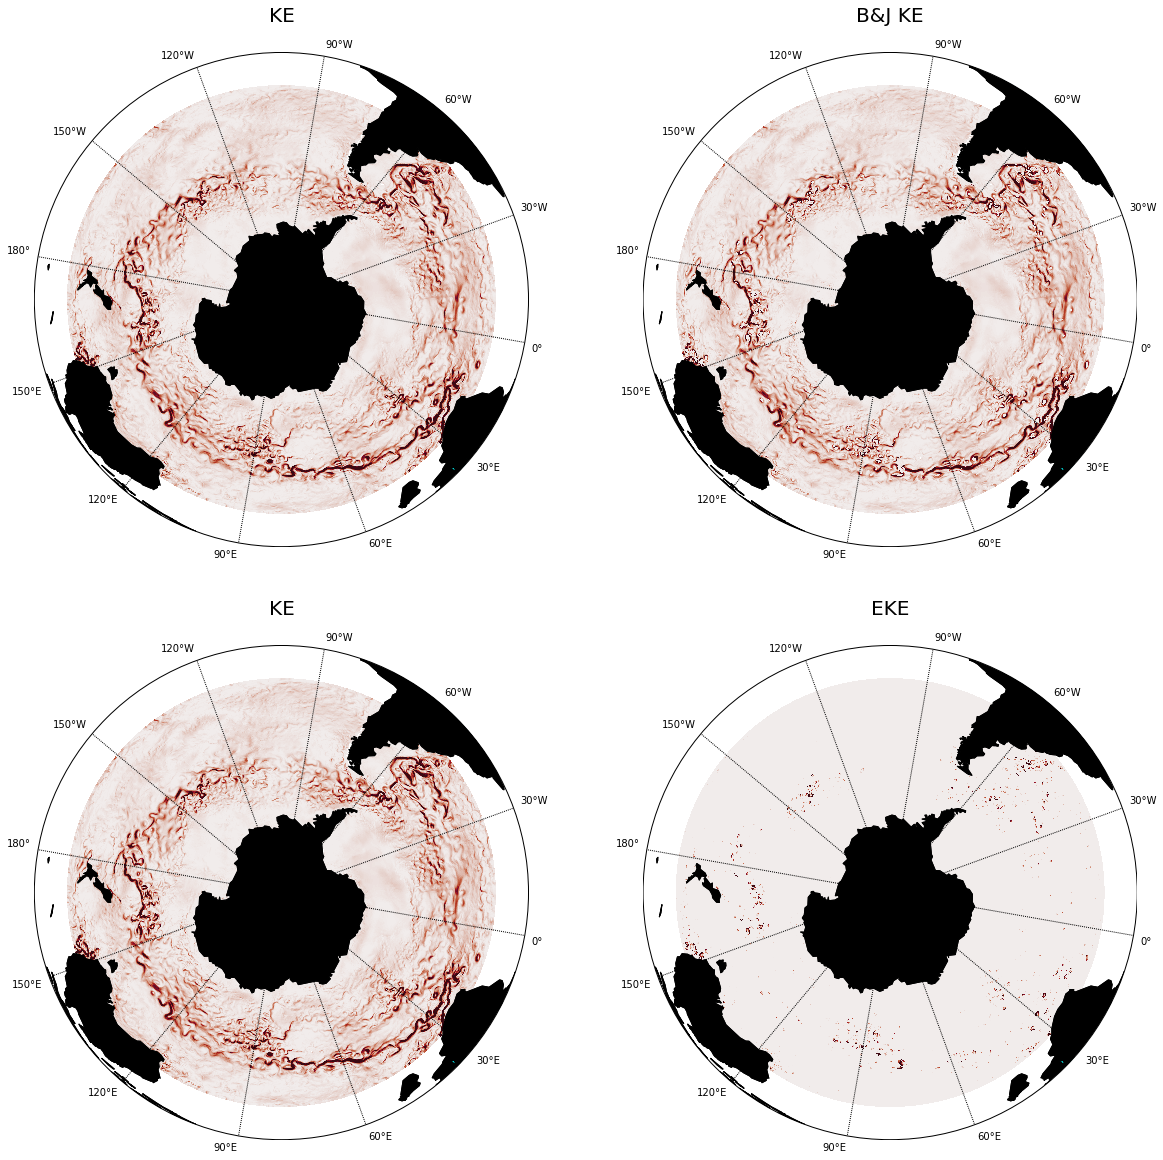

In [20]:
ke=KE(u,v)
basemap_mplot(lon,lat,[ke,bjke,ke,eke]\
              ,title=["KE","B&J KE","KE","EKE"],scale='Lin',cmap=cm.cm.balance,\
              vmin=-0.2,vmax=0.2,xan=2,yan=2,figsize=(20,20),fontsize=20);